In [46]:
import numpy as np

data = {}

data["height"] = np.random.normal(170, 10, 1000)
data["weight"] = np.random.normal(data["height"], 10, 1000) / 2.0

<AxesSubplot:>

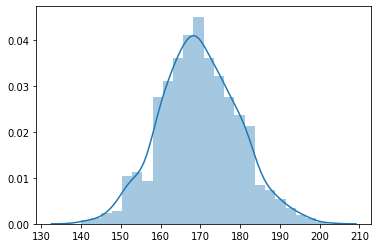

In [47]:
import seaborn as sns

sns.distplot(data["height"])

<AxesSubplot:>

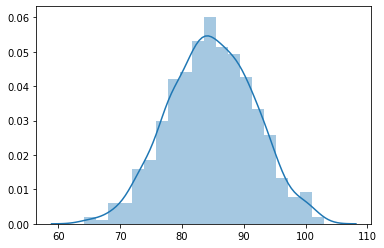

In [48]:
sns.distplot(data["weight"])

In [49]:
data["bmi"] = data["weight"]/(data["height"]/100.0)**2

<AxesSubplot:>

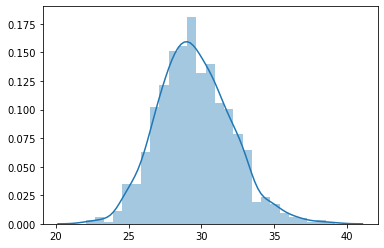

In [50]:
sns.distplot(data["bmi"])

In [51]:
import pandas as pd

df = pd.DataFrame.from_dict(data)
df.describe()

,height,weight,bmi
count,1000.000000,1000.000000,1000.000000
mean,169.732331,84.778971,29.532806
std,9.791200,6.885524,2.503196
min,139.960323,64.064921,22.043260
25%,163.150333,79.963493,27.856689
50%,169.318304,84.714549,29.373616
75%,176.217602,89.696182,31.102579
max,201.741279,102.965271,39.169188


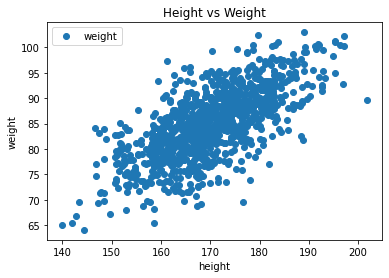

In [52]:
import matplotlib.pyplot as plt

df.plot(x='height', y='weight', style='o')  
plt.title('Height vs Weight')  
plt.xlabel('height')  
plt.ylabel('weight')  
plt.show()

In [53]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df[['height', 'weight']]
y = df['bmi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [55]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

59.018366499423934
[-0.34832806  0.34966763]


In [56]:
y_pred = regressor.predict(X_test)

In [57]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred

,Actual,Predicted
993,32.218819,32.265630
859,27.940437,27.971765
298,29.163160,29.298812
553,31.742283,31.817924
672,29.281642,29.401980
...,...,...
679,28.738095,28.882387
722,27.614336,27.604123
215,25.371221,25.588986
653,28.012225,28.150981


In [58]:
# Save the model to PMML
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn_pandas import DataFrameMapper
from nyoka import skl_to_pmml

pipeline = make_pipeline(LinearRegression())

print(X_train)
pipeline.fit(X_train, y_train)

height      weight
687  170.737998   84.699468
500  193.274297   93.975809
332  176.012318   88.304405
979  154.346842   77.832160
817  161.121127   97.242998
..          ...         ...
835  169.422379   85.253162
192  168.311397   79.355226
629  181.555673   88.125384
559  179.663681  102.456111
684  178.952869   91.611854

[800 rows x 2 columns]


Pipeline(steps=[('linearregression', LinearRegression())])

In [59]:
features = df.columns.drop('bmi')
skl_to_pmml(pipeline, features, target_name='bmi', pmml_f_name="../models/bmi.pmml")